In [6]:
# the vast majority of wikipedia articles will lead to philosophy if you keep clicking the first link
# this notebook performs and analyses data on a sample of random articles
# find out more and read the rules at https://en.wikipedia.org/wiki/Wikipedia:Getting_to_Philosophy
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

df = pd.DataFrame()

article_count = 0
loop = False
for search in range(200):
    article_count += 1
    print(f"Article count = {article_count}")
    response = requests.get("https://en.wikipedia.org/wiki/Special:Random")   
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all("p")
    links = []
    links.append(str(response.url))

    print(links[0][24:])

    while links[-1] != "https://en.wikipedia.org/wiki/Philosophy":
        paragraphs = str(paragraphs)
        start = 0
        stop = 0
        start_found = False
        stop_found = False
        iteration = 0
        
        # this section removes bracketed text as per the rules 
        while start != len(paragraphs):
            start = 0
            stop = 0
            start_found = False
            stop_found = False
            iteration += 1
            if iteration > 100:
                break
            while not stop_found:
                if paragraphs[start] == "]":
                    break                   
                # != "_" condition needed avoid deleting valid links like "wiki/power_(physics)"
                # because the script does not know the difference between links and other text
                # when it looks at the HTML
                faulty_text = False # this is necessary if the article has an unclosed bracket
                try:
                    if paragraphs[start] == "(" and paragraphs[start-1] != "_":
                        stop = start + 1
                        start_found = True
                        other_bracket_found = False
                        while not stop_found:
                            if paragraphs[stop] == "(":
                                other_bracket_found = True
                                while other_bracket_found:                    
                                    stop += 1
                                    if paragraphs[stop] == ")":
                                        stop += 1
                                        other_bracket_found = False
                            if paragraphs[stop] == ")":
                                stop_found = True
                                paragraphs = paragraphs[:start] + paragraphs[stop+1:]
                            else:
                                stop += 1 
                    elif not start_found:
                        start += 1
                    else:
                        paragraphs[start:stop+1] = ""
                        break
                except IndexError:
                    faulty_text = True                
                    break                    
        # this section finds and copies the first link
        if not faulty_text:
            start = 0
            stop = 6
            time_start = time.time() 
            while (time.time() - time_start) < 20: # times-out at 20 seconds
                if paragraphs[start+12:stop+12] == "#cite_": # this avoids citations
                    start += 12
                    stop += 12
                    continue
                if paragraphs[start+6:stop+5] == 'href=':
                    # this makes sure it doesn't click on a "citation needed" links,
                    # coordinates links, or IPA pronounciation links, or wiki discussion pages
                    if paragraphs[start+12:stop+17] == "/wiki/Talk:" or paragraphs[start+12:stop+22] == "/wiki/Wikipedia:" or paragraphs[start+12:stop+17] == "/wiki/File:" or paragraphs[start+12:stop+30] == "//geohack.toolforge.org/" or paragraphs[start+12:stop+37] == "/wiki/Wikipedia:Citation_needed" or paragraphs[start+12:stop+17] == "/wiki/Help:":
                        start += 1
                        stop += 1
                        continue        
                    start += 6
                    stop += 5
                    while True:
                        stop += 1
                        if paragraphs[stop] == '"':
                            start += 6
                            break            
                    break
                else:
                    start += 1
                    stop += 1     
                if time.time() - time_start > 20:
                    print("Timeout")
                    break
                
        print(paragraphs[start:stop])
        
        if faulty_text:
            print("Error: check article for unclosed brackets")
        
        invalid_link = False                                        # filters out (W/w)iktionary links
        if "/wiki/" not in paragraphs[start:stop] or faulty_text or "iktionary" in paragraphs[start:stop]:
            print("INVALID LINK")
            invalid_link = True
            break
            
        response = requests.get(f"https://en.wikipedia.org{paragraphs[start:stop]}") 
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all("p")
        
        loop = False
        if str(response.url) in links:
            print("LOOP")
            loop = True
            break
            
        links.append(str(response.url))

    print("\n")        
    for i in range(len(links)):
        links[i] = links[i][30:]
        
    if invalid_link:
        links[-1] = "*invalid link*"
    
    if loop:
        links[-1] = "*loop*"
    
    temp_df = pd.DataFrame([links])
    df = pd.concat([df, temp_df])

Article count = 1
/wiki/Flavor_of_Life
/wiki/Hikaru_Utada
/wiki/Mononym
/wiki/Afghan_name
/wiki/Afghans
/wiki/Afghanistan
/wiki/Central_Asia
/wiki/Subregion
/wiki/Region
/wiki/Geography
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 2
/wiki/La_Plata_County,_Colorado
/wiki/U.S._state
/wiki/United_States
/wiki/Continental_United_States
/wiki/U.S._state
LOOP


Article count = 3
/wiki/Shahabad_Assembly_constituency
/wiki/Uttar_Pradesh_Legislative_Assembly
/wiki/Official_Opposition_(India)
/wiki/Upper_house
/wiki/Legislative_chamber
/wiki/Deliberative_assembly
/wiki/Collective
/wiki/Cooperative
/wiki/Autonomy
/wiki/Developmental_psychology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 4
/wiki/John_Owoeri
/wiki/Association_football
/wiki/Tea

/wiki/Tertiary_education
/wiki/Education
/wiki/Knowledge
/wiki/Awareness
/wiki/Psychology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 28
/wiki/SNUB
/wiki/Norwich
/wiki/Cathedral_city
/wiki/The_Crown
/wiki/State_(polity)
/wiki/Politics
/wiki/Decision-making
/wiki/Psychology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 29
/wiki/Villanders
/wiki/Comune
/wiki/Administrative_division
/wiki/Sovereign_state
/wiki/State_(polity)
/wiki/Politics
/wiki/Decision-making
/wiki/Psychology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 30
/wiki/Samrat_Prithviraj
/wiki/Historical_drama
/wiki/Drama
/wiki/Mode_(literature)
/w

/wiki/Municipality
/wiki/Administrative_division
/wiki/Sovereign_state
/wiki/State_(polity)
/wiki/Politics
/wiki/Decision-making
/wiki/Psychology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 53
/wiki/2008%E2%80%9309_Arab_Champions_League
/wiki/Arab_Champions_League
/wiki/Association_football
/wiki/Team_sport
/wiki/Sport
/wiki/Physical_activity
/wiki/Exercise
/wiki/Human_body
/wiki/Human
/wiki/Species
/wiki/Biology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 54
/wiki/Jhugian_Gulam
/wiki/Kapurthala_district
/wiki/Punjab_(India)
/wiki/States_and_union_territories_of_India
/wiki/India
/wiki/South_Asia
/wiki/Subregion#Asia
/wiki/Region
/wiki/Geography
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki

/wiki/Exercise
/wiki/Human_body
/wiki/Human
/wiki/Species
/wiki/Biology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 78
/wiki/Greeks_in_Serbia
/wiki/Greeks
/wiki/Ethnic_group
/wiki/People
/wiki/Person
/wiki/Reason
/wiki/Logic
/wiki/Logical_reasoning
/wiki/Rigour
/wiki/Famine
/wiki/Food
/wiki/Organism
/wiki/Biological
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 79
/wiki/Sea
/wiki/Body_of_water
/wiki/Water
/wiki/Inorganic_compound
/wiki/Chemistry
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 80
/wiki/Sardi_Khola_Hydropower_Station
/wiki/Kaski_District
/wiki/Gandaki_Province
//upload.wikimedia.org/wikipedia/c

/wiki/Emma_Beiter_Bomme
/wiki/Sprint_(running)
/wiki/Running
/wiki/Terrestrial_locomotion
/wiki/Evolution
/wiki/Biology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 104
/wiki/2011_East_Dorset_District_Council_election
/wiki/East_Dorset
/wiki/Non-metropolitan_district
/wiki/Districts_of_England
/wiki/Subdivisions_of_England
/wiki/England
/wiki/Europe
/wiki/Continent
/wiki/Geography
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 105
/wiki/Federal_Crop_Insurance_Reform_and_Department_of_Agriculture_Reorganization_Act_of_1994
/wiki/Public_Law_(United_States)
/wiki/Statute
/wiki/Legislature
/wiki/Deliberative_assembly
/wiki/Collective
/wiki/Cooperative
/wiki/Autonomy
/wiki/Developmental_psychology
/wiki/Science
/wiki/Scientific_method
/wik

/wiki/Legal_entity
/wiki/Law
/wiki/Law_enforcement
/wiki/Government
/wiki/State_(polity)
/wiki/Politics
/wiki/Decision-making
/wiki/Psychology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 128
/wiki/Sighata
/wiki/Syria
/wiki/Western_Asia
/wiki/Asia
/wiki/Continent
/wiki/Geography
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 129
/wiki/Latin_American_drug_legalization
/wiki/Latin_America
/wiki/Americas
/wiki/North_America
/wiki/Continent
/wiki/Geography
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 130
/wiki/Non-Religious_Pastoral_Support_Network
/wiki/Pastoral_care
/wiki/Emotion
/wiki/Mental_state
/wiki/Mind


/wiki/Human_behavior
/wiki/Human
/wiki/Species
/wiki/Biology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 152
/wiki/Titan_Media
/wiki/List_of_pornographic_film_studios#Homosexual
/wiki/Pornography
/wiki/Human_sexual_activity
/wiki/Human
/wiki/Species
/wiki/Biology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 153
/wiki/Australian_Commendations_and_Citations
Timeout

INVALID LINK


Article count = 154
/wiki/James_Holmes_(trade_unionist)
/wiki/British_people
/wiki/United_Kingdom
/wiki/Europe
/wiki/Continent
/wiki/Geography
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 155
/wiki/Larmer_Tree_Gardens
/wiki/Tollar



Article count = 177
/wiki/Pat_Jordan
/wiki/Trotskyist
/wiki/Marxism
/wiki/Left-wing_politics
/wiki/Ideology#Political_ideologies
/wiki/Belief
/wiki/Attitude_(psychology)
/wiki/Psychology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 178
/wiki/Health_and_Ageing
/wiki/Geneva_Association,_The
/wiki/Geneva_Association,_The
LOOP


Article count = 179
/wiki/2000%E2%80%9301_Gamma_Ethniki
/wiki/Patraikos_F.C.
/wiki/Football_(soccer)
/wiki/Team_sport
/wiki/Sport
/wiki/Physical_activity
/wiki/Exercise
/wiki/Human_body
/wiki/Human
/wiki/Species
/wiki/Biology
/wiki/Science
/wiki/Scientific_method
/wiki/Empirical_evidence
/wiki/Proposition
/wiki/Semantics
/wiki/Reference
/wiki/Object_(philosophy)
/wiki/Philosophy


Article count = 180
/wiki/Gener_Tinangag
/wiki/Enlisted_rank
/wiki/Military_rank
/wiki/Hierarchy
/wiki/Architecture
/wiki/Planning
/wiki/Process
/wiki/Action_

In [2]:
##REMEMBER TO CONCAT THE PAST DATA I COLLECTED
#REMEMBER TO REMOVE THE SPARE INDEX COLUMN UNNAMED 0
results = pd.read_csv("wiki_results.csv")
results1 = pd.read_csv("wiki_results1.csv")
results2 = pd.read_csv("wiki_results1.csv")

In [17]:
results = pd.concat([results,results1,results2],axis=1)
results_backup = results
results.drop(columns=results.columns[0], axis=1,  inplace=True) # removes junk first column
results.columns = [x for x in range(0, len(results.columns))] # names columns in increasing number
results

,0,1,2,3,4,5,6,7,8,9,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101
0,Briercrest,Alap%C3%B5dra,Piero_Remor,Graham_Coughlan,Pont_del_Diable,"Kas%C4%B1ml%C4%B1,_%C5%9Eirvan",List_of_advertising_awards,"Nowy_Dw%C3%B3r,_Trzebnica_County",Oleksandr_Kucherenko,Knight_Rider_(1986_video_game),...,"Kurrajong,_New_South_Wales",Abdul_Rauf_Azhar,The_Past_Hunters,Edgardo_Gal%C3%ADndez,List_of_original_Beyblade_episodes,Chris_Bassitt,"Moore_Township,_Stevens_County,_Minnesota",Tshuah-ping,Take_You_Down_(Illenium_song),Imperial_Cabinet_of_the_Russian_Empire
1,Village,Village,Italians,Manager_(association_football),Medieval,%C5%9Eirvan_District,Advertising,Gmina_Trzebnica,Association_football,Knight_Rider_(1982_TV_series),...,New_South_Wales,Pakistanis,Paranormal,Argentina,Anime,Professional_baseball,"Stevens_County,_Minnesota",Chinese_language,Illenium,House_of_Romanov
2,Human_settlement,Human_settlement,Ethnic_group,Association_football,History_of_Europe,Siirt_Province,Branding_(promotional),Gmina,Team_sport,Action_fiction,...,States_and_territories_of_Australia,Pakistani_nationality_law,Popular_culture,South_America,Traditional_animation,Baseball,County_(United_States),Written_Chinese,DJ,Romanization_of_Russian
3,Geography,Geography,People,Team_sport,Prehistoric_Europe,Provinces_of_Turkey,Business,Poland,Sport,Literary_genre,...,Federated_state,Coming_into_force,Society,Continent,Animation,Bat-and-ball_games,United_States,Chinese_characters,Radio_personality,Romanization
4,Science,Science,Person,Sport,Lower_Paleolithic,Turkey,Trade,Europe,Physical_activity,Literature,...,Constitution,Law,Social_group,Geography,Image,Playing_field,Continental_United_States,Logogram,Radio_broadcasting,Linguistics
5,Scientific_method,Scientific_method,Reason,Physical_activity,Fertile_Crescent,List_of_transcontinental_countries,System,Continent,Exercise,Writing,...,Principles,Law_enforcement,Social_science,Science,Three-dimensional,Sport,*loop*,Written_language,Broadcasting,Language
6,Empirical_evidence,Empirical_evidence,Logic,Exercise,Middle_East,Country,Environment_(systems),Geography,Human_body,Cognition,...,Law,Government,Branches_of_science,Scientific_method,Geometry,Physical_activity,NaN,Language,Distribution_(business),Communication
7,Proposition,Proposition,Logical_reasoning,Human_body,Arabian_Peninsula,Earth,Science,Science,Human,Intellect,...,Law_enforcement,State_(polity),Sciences,Empirical_evidence,Arithmetic,Exercise,NaN,Communication,Value_chain,Information
8,Semantics,Semantics,Rigour,Human,Arabic_language,*loop*,Scientific_method,Scientific_method,Species,Ability,...,Government,Politics,Scientific_method,Proposition,Mathematics,Human_body,NaN,Information,Product_(business),Abstraction
9,Reference,Reference,Famine,Species,Semitic_languages,NaN,Empirical_evidence,Empirical_evidence,Biology,Action_(philosophy),...,State_(polity),Decision-making,Empirical_evidence,Semantics,Knowledge,Human,NaN,Abstraction,Consumer,Rule_of_inference


In [31]:
only_philosophy

,0,1,2,3,4,6,7,8,9,10,...,2091,2092,2093,2094,2095,2096,2097,2099,2100,2101
0,Briercrest,Alap%C3%B5dra,Piero_Remor,Graham_Coughlan,Pont_del_Diable,List_of_advertising_awards,"Nowy_Dw%C3%B3r,_Trzebnica_County",Oleksandr_Kucherenko,Knight_Rider_(1986_video_game),Yordan_Manduley,...,Johnny_Podesto,"Kurrajong,_New_South_Wales",Abdul_Rauf_Azhar,The_Past_Hunters,Edgardo_Gal%C3%ADndez,List_of_original_Beyblade_episodes,Chris_Bassitt,Tshuah-ping,Take_You_Down_(Illenium_song),Imperial_Cabinet_of_the_Russian_Empire
1,Village,Village,Italians,Manager_(association_football),Medieval,Advertising,Gmina_Trzebnica,Association_football,Knight_Rider_(1982_TV_series),Professional_baseball,...,American_football,New_South_Wales,Pakistanis,Paranormal,Argentina,Anime,Professional_baseball,Chinese_language,Illenium,House_of_Romanov
2,Human_settlement,Human_settlement,Ethnic_group,Association_football,History_of_Europe,Branding_(promotional),Gmina,Team_sport,Action_fiction,Baseball,...,Team_sport,States_and_territories_of_Australia,Pakistani_nationality_law,Popular_culture,South_America,Traditional_animation,Baseball,Written_Chinese,DJ,Romanization_of_Russian
3,Geography,Geography,People,Team_sport,Prehistoric_Europe,Business,Poland,Sport,Literary_genre,Bat-and-ball_games,...,Sport,Federated_state,Coming_into_force,Society,Continent,Animation,Bat-and-ball_games,Chinese_characters,Radio_personality,Romanization
4,Science,Science,Person,Sport,Lower_Paleolithic,Trade,Europe,Physical_activity,Literature,Playing_field,...,Physical_activity,Constitution,Law,Social_group,Geography,Image,Playing_field,Logogram,Radio_broadcasting,Linguistics
5,Scientific_method,Scientific_method,Reason,Physical_activity,Fertile_Crescent,System,Continent,Exercise,Writing,Sport,...,Exercise,Principles,Law_enforcement,Social_science,Science,Three-dimensional,Sport,Written_language,Broadcasting,Language
6,Empirical_evidence,Empirical_evidence,Logic,Exercise,Middle_East,Environment_(systems),Geography,Human_body,Cognition,Physical_activity,...,Human_body,Law,Government,Branches_of_science,Scientific_method,Geometry,Physical_activity,Language,Distribution_(business),Communication
7,Proposition,Proposition,Logical_reasoning,Human_body,Arabian_Peninsula,Science,Science,Human,Intellect,Exercise,...,Human,Law_enforcement,State_(polity),Sciences,Empirical_evidence,Arithmetic,Exercise,Communication,Value_chain,Information
8,Semantics,Semantics,Rigour,Human,Arabic_language,Scientific_method,Scientific_method,Species,Ability,Human_body,...,Species,Government,Politics,Scientific_method,Proposition,Mathematics,Human_body,Information,Product_(business),Abstraction
9,Reference,Reference,Famine,Species,Semitic_languages,Empirical_evidence,Empirical_evidence,Biology,Action_(philosophy),Human,...,Biology,State_(polity),Decision-making,Empirical_evidence,Semantics,Knowledge,Human,Abstraction,Consumer,Rule_of_inference


In [35]:
results.isin(["Philosophy"]).any()

0        True
1        True
2        True
3        True
4        True
        ...  
2097     True
2098    False
2099     True
2100     True
2101     True
Length: 2102, dtype: bool

In [47]:
## TO DO: remove columns which don't lead to philopshy like loops or invalid links because
# that will not be valid when it comes to seeing how many links it takes on average,
# or how often each article appears

# here only columns whose paths landed on Philosophy are included for the sake of the later analysis
cols_with_value = results.isin(["Philosophy"]).any()
only_philosophy = results.loc[:, cols_with_value]
only_philosophy.columns = [x for x in range(0, len(only_philosophy.columns))] # resets columns to integers after being turned to strings
only_philosophy

,0,1,2,3,4,5,6,7,8,9,...,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856
0,Briercrest,Alap%C3%B5dra,Piero_Remor,Graham_Coughlan,Pont_del_Diable,List_of_advertising_awards,"Nowy_Dw%C3%B3r,_Trzebnica_County",Oleksandr_Kucherenko,Knight_Rider_(1986_video_game),Yordan_Manduley,...,Johnny_Podesto,"Kurrajong,_New_South_Wales",Abdul_Rauf_Azhar,The_Past_Hunters,Edgardo_Gal%C3%ADndez,List_of_original_Beyblade_episodes,Chris_Bassitt,Tshuah-ping,Take_You_Down_(Illenium_song),Imperial_Cabinet_of_the_Russian_Empire
1,Village,Village,Italians,Manager_(association_football),Medieval,Advertising,Gmina_Trzebnica,Association_football,Knight_Rider_(1982_TV_series),Professional_baseball,...,American_football,New_South_Wales,Pakistanis,Paranormal,Argentina,Anime,Professional_baseball,Chinese_language,Illenium,House_of_Romanov
2,Human_settlement,Human_settlement,Ethnic_group,Association_football,History_of_Europe,Branding_(promotional),Gmina,Team_sport,Action_fiction,Baseball,...,Team_sport,States_and_territories_of_Australia,Pakistani_nationality_law,Popular_culture,South_America,Traditional_animation,Baseball,Written_Chinese,DJ,Romanization_of_Russian
3,Geography,Geography,People,Team_sport,Prehistoric_Europe,Business,Poland,Sport,Literary_genre,Bat-and-ball_games,...,Sport,Federated_state,Coming_into_force,Society,Continent,Animation,Bat-and-ball_games,Chinese_characters,Radio_personality,Romanization
4,Science,Science,Person,Sport,Lower_Paleolithic,Trade,Europe,Physical_activity,Literature,Playing_field,...,Physical_activity,Constitution,Law,Social_group,Geography,Image,Playing_field,Logogram,Radio_broadcasting,Linguistics
5,Scientific_method,Scientific_method,Reason,Physical_activity,Fertile_Crescent,System,Continent,Exercise,Writing,Sport,...,Exercise,Principles,Law_enforcement,Social_science,Science,Three-dimensional,Sport,Written_language,Broadcasting,Language
6,Empirical_evidence,Empirical_evidence,Logic,Exercise,Middle_East,Environment_(systems),Geography,Human_body,Cognition,Physical_activity,...,Human_body,Law,Government,Branches_of_science,Scientific_method,Geometry,Physical_activity,Language,Distribution_(business),Communication
7,Proposition,Proposition,Logical_reasoning,Human_body,Arabian_Peninsula,Science,Science,Human,Intellect,Exercise,...,Human,Law_enforcement,State_(polity),Sciences,Empirical_evidence,Arithmetic,Exercise,Communication,Value_chain,Information
8,Semantics,Semantics,Rigour,Human,Arabic_language,Scientific_method,Scientific_method,Species,Ability,Human_body,...,Species,Government,Politics,Scientific_method,Proposition,Mathematics,Human_body,Information,Product_(business),Abstraction
9,Reference,Reference,Famine,Species,Semitic_languages,Empirical_evidence,Empirical_evidence,Biology,Action_(philosophy),Human,...,Biology,State_(polity),Decision-making,Empirical_evidence,Semantics,Knowledge,Human,Abstraction,Consumer,Rule_of_inference


In [ ]:
## to d: list some of the most common routes, e.g., science or politics

In [125]:
len(uniques)

492

In [67]:
# this finds all the unique values
all_articles = [article_name for column in range(len(only_philosophy.columns)) for article_name in only_philosophy[column].unique()]
uniques = list(set(all_articles))
uniques_counts = [all_articles.count(i) for i in uniques]
df0 = pd.DataFrame(uniques,columns=["Articles seen"])
df1 = pd.DataFrame(uniques_counts,columns=["Counts"])
article_counts = pd.concat([df0,df1],axis=1)
article_counts.dropna(inplace=True)
article_counts.sort_values(by=["Counts"],ascending=False,inplace=True)
article_counts.head(10)

,Articles seen,Counts
19,Empirical_evidence,1857
385,Semantics,1857
846,Proposition,1857
822,Object_(philosophy),1857
668,Philosophy,1857
759,Reference,1857
1000,Scientific_method,1847
121,Science,1485
282,Psychology,495
16,Biology,438


In [82]:
type(article_counts["Articles seen"])

pandas.core.series.Series

In [83]:
article_counts["Articles seen"].to_list()

['Empirical_evidence',
 'Semantics',
 'Proposition',
 'Object_(philosophy)',
 'Philosophy',
 'Reference',
 'Scientific_method',
 'Science',
 'Psychology',
 'Biology',
 'Sciences',
 'Branches_of_science',
 'Species',
 'Human',
 'Geography',
 'Politics',
 'Decision-making',
 'State_(polity)',
 'Physical_activity',
 'Exercise',
 'Human_body',
 'Sport',
 'Natural_science',
 'Physics',
 'Continent',
 'Awareness',
 'Europe',
 'Team_sport',
 'Observable',
 'Phenomenon',
 'Biological',
 'Organism',
 'Logic',
 'Famine',
 'Food',
 'Rigour',
 'Logical_reasoning',
 'Knowledge',
 'Sovereign_state',
 'Abstraction',
 'Information',
 'Rule_of_inference',
 'Social_science',
 'Communication',
 'Language',
 'Association_football',
 'Creativity',
 'Administrative_division',
 'The_arts',
 'Taxonomic_rank',
 'Chemistry',
 'Government',
 'Music',
 'Law',
 'Law_enforcement',
 'Consciousness',
 'Power_(physics)',
 'Mental_state',
 'Machine',
 'Mind',
 'Mathematics',
 'Region',
 'Language_family',
 'Education',

In [87]:
L = [x for x in article_counts["Articles seen"].head(30).to_list()]
L

['Empirical_evidence',
 'Semantics',
 'Proposition',
 'Object_(philosophy)',
 'Philosophy',
 'Reference',
 'Scientific_method',
 'Science',
 'Psychology',
 'Biology',
 'Sciences',
 'Branches_of_science',
 'Species',
 'Human',
 'Geography',
 'Politics',
 'Decision-making',
 'State_(polity)',
 'Physical_activity',
 'Exercise',
 'Human_body',
 'Sport',
 'Natural_science',
 'Physics',
 'Continent',
 'Awareness',
 'Europe',
 'Team_sport',
 'Observable',
 'Phenomenon']

In [88]:
bar_df = pd.DataFrame({"Articles":[x for x in article_counts["Articles seen"].head(30).to_list()],
                       "No. visits": [x for x in article_counts["Counts"].head(30).to_list()]})
bar_df

,Articles,No. visits
0,Empirical_evidence,1857
1,Semantics,1857
2,Proposition,1857
3,Object_(philosophy),1857
4,Philosophy,1857
5,Reference,1857
6,Scientific_method,1847
7,Science,1485
8,Psychology,495
9,Biology,438


In [90]:
top_visits

,Articles seen,Counts
19,Empirical_evidence,1857
385,Semantics,1857
846,Proposition,1857
822,Object_(philosophy),1857
668,Philosophy,1857
759,Reference,1857
1000,Scientific_method,1847
121,Science,1485
282,Psychology,495
16,Biology,438


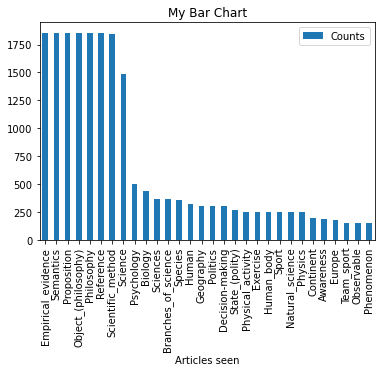

In [91]:
import matplotlib.pyplot as plt

top_visits = article_counts.head(30)
# Create a bar chart
top_visits.plot(kind='bar', x='Articles seen', y='Counts', title='My Bar Chart')

# Show the plot
plt.show()

In [55]:
# this finds the number of articles in each search
list_of_counts = []
list_of_counts = [len(results[i].unique()) for i in range(len(results.columns))]
                             # the max possible value = no. of rows
list_of_counts = [i-1 if i < len(results) else i for i in list_of_counts] # removes the "nan"s

np.average(list_of_counts)



16.59